In [67]:
import pm4py
import pandas as pd
import conformance_checker as cc
import os

In [68]:


log = pm4py.read_xes('./event_logs/test_event_log.xes')
log.head()

parsing log, completed traces :: 100%|██████████| 17/17 [00:00<00:00, 7244.05it/s]
/Users/lakhoune/Desktop/Repos/mobsos-event-log-generator/.venv/lib/python3.11/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/lakhoune/Desktop/Repos/mobsos-event-log-generator/.venv/lib/python3.11/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/lakhoune/Desktop/Repos/mobsos-event-log-generator/.venv/lib/python3.11/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so 

,EVENT,concept:name,time:timestamp,lifecycle:transition,RESOURCE,RESOURCE_TYPE,REMARKS,case:concept:name
0,SERVICE_REQUEST,getMenu,2023-07-30 09:51:17+00:00,start,28d2024790065ba320fd009ac8c575864e7670e5e4adee...,bot,{},ba5a024c-4fd1-4b76-a0dd-815df1534d3a
1,SERVICE_REQUEST,getMenu,2023-07-30 09:51:17+00:00,complete,28d2024790065ba320fd009ac8c575864e7670e5e4adee...,bot,{},ba5a024c-4fd1-4b76-a0dd-815df1534d3a
2,SERVICE_REQUEST,getMenu,2023-07-30 09:51:34+00:00,start,28d2024790065ba320fd009ac8c575864e7670e5e4adee...,bot,{},b6755b3c-93ec-4884-8e85-c142bfcdc429
3,SERVICE_REQUEST,getMenu,2023-07-30 09:51:35+00:00,complete,28d2024790065ba320fd009ac8c575864e7670e5e4adee...,bot,{},b6755b3c-93ec-4884-8e85-c142bfcdc429
4,SERVICE_REQUEST,getMenu,2023-07-30 09:51:42+00:00,start,28d2024790065ba320fd009ac8c575864e7670e5e4adee...,bot,{},2f77046f-14d7-487e-b603-52d8b2ce8666


# Discovered Model

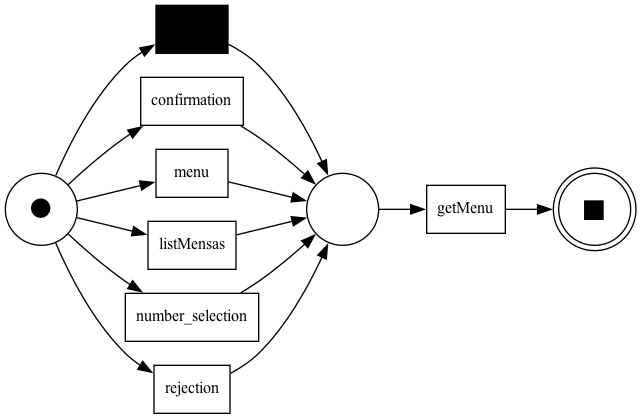

In [69]:

log['time:timestamp'] = pd.to_datetime(log['time:timestamp'])
log =log[(log['EVENT'] == 'SERVICE_REQUEST') | (log['EVENT'] == 'USER_MESSAGE')]
log = log[(log['lifecycle:transition'] == 'complete') ]

net,im,fm = pm4py.discover_petri_net_heuristics(log)
pm4py.view_petri_net(net,im,fm)

In [70]:
traces = pm4py.get_variants(log)
traces

{('listMensas', 'getMenu'): 1,
 ('greeting',): 2,
 ('getMenu',): 9,
 ('rejection', 'getMenu'): 1,
 ('menu', 'getMenu'): 2,
 ('number_selection', 'getMenu'): 1,
 ('confirmation', 'getMenu'): 1}

# Bot Model

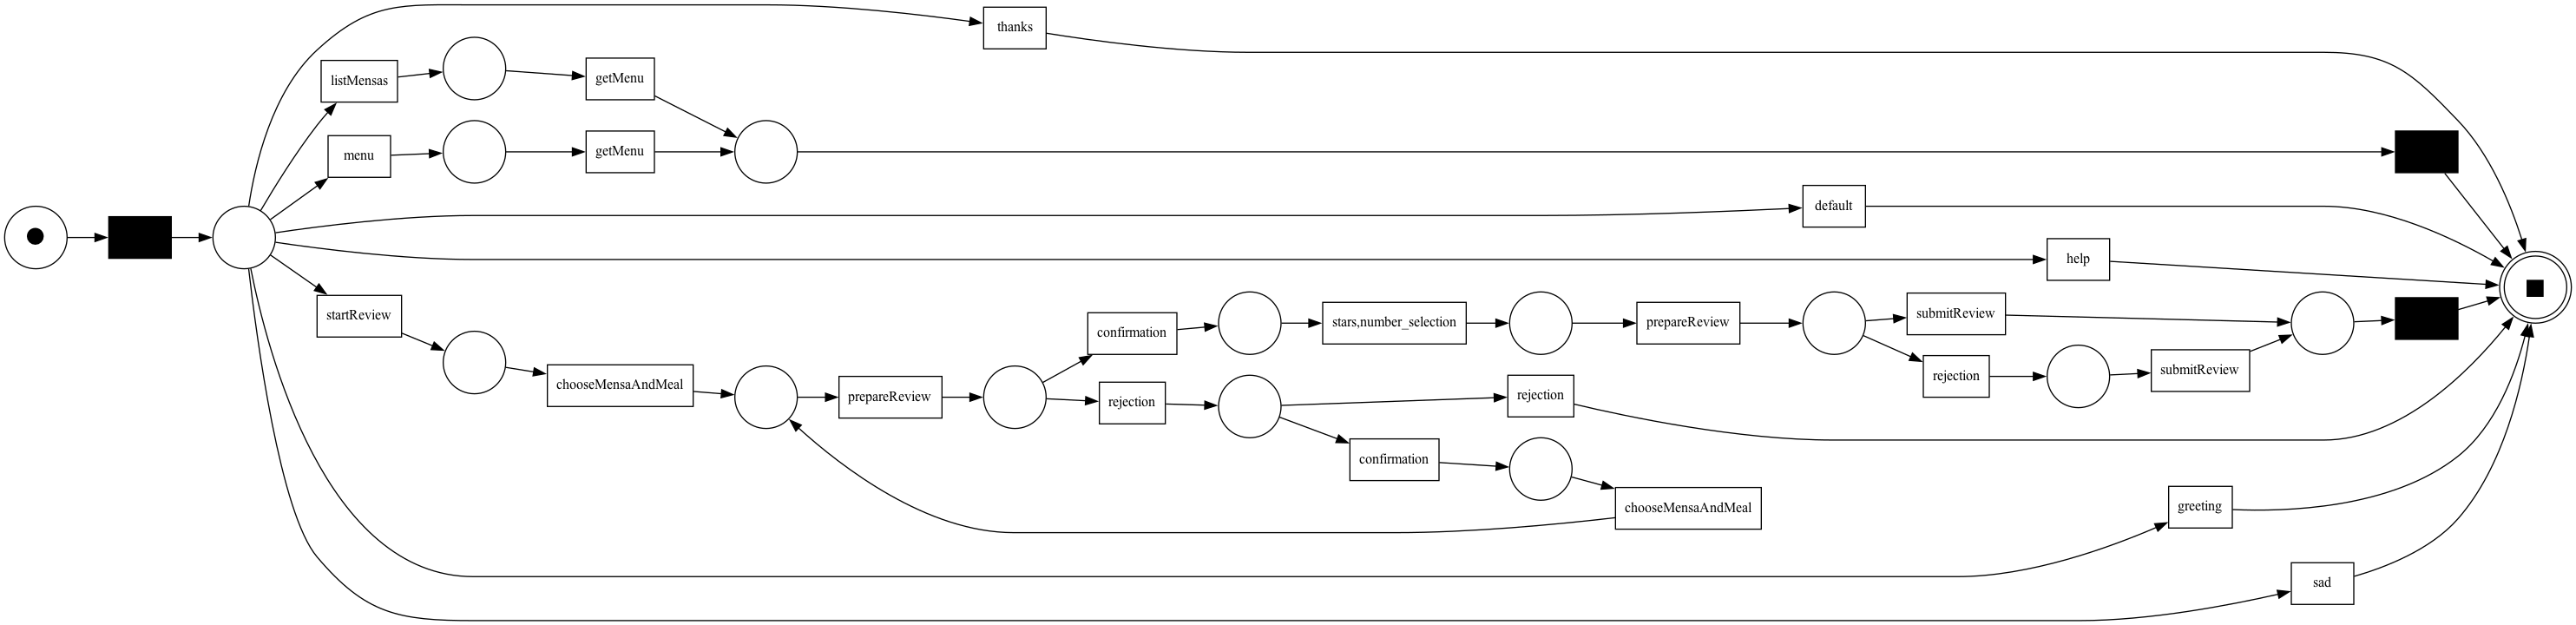

replaying log with TBR, completed variants :: 100%|██████████| 7/7 [00:00<00:00, 6034.97it/s]


{'perc_fit_traces': 29.41176470588235,
 'average_trace_fitness': 0.7450980392156863,
 'log_fitness': 0.7627118644067796,
 'percentage_of_fitting_traces': 29.41176470588235}

In [71]:
model = cc.load_default_bot_model()
bot_net,bot_im,bot_fm= cc.to_petri_net(model)
bot_net=pm4py.reduce_petri_net_invisibles(bot_net)
pm4py.view_petri_net(bot_net,bot_im,bot_fm)

fitness = pm4py.fitness_token_based_replay(log,bot_net,bot_im,bot_fm)
fitness

In [72]:
diagnostics = pm4py.conformance_diagnostics_alignments(log,net,im,fm)
# filter for fitness less than 1
unfitting = list(trace for trace in diagnostics if trace['fitness'] < 1)
fitting = list(trace for trace in diagnostics if trace['fitness']==1)
unfitting

aligning log, completed variants :: 100%|██████████| 7/7 [00:00<00:00, 1404.86it/s]


[{'alignment': [('greeting', '>>'), ('>>', None), ('>>', 'getMenu')],
  'cost': 20001,
  'visited_states': 3,
  'queued_states': 14,
  'traversed_arcs': 14,
  'lp_solved': 4,
  'fitness': 0.0,
  'bwc': 20001},
 {'alignment': [('greeting', '>>'), ('>>', None), ('>>', 'getMenu')],
  'cost': 20001,
  'visited_states': 3,
  'queued_states': 14,
  'traversed_arcs': 14,
  'lp_solved': 4,
  'fitness': 0.0,
  'bwc': 20001}]